<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lagrange-Interpolation" data-toc-modified-id="Lagrange-Interpolation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lagrange Interpolation</a></span></li><li><span><a href="#LU-Decomposition" data-toc-modified-id="LU-Decomposition-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LU Decomposition</a></span></li><li><span><a href="#SVD-&amp;-FFT-Compression" data-toc-modified-id="SVD-&amp;-FFT-Compression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SVD &amp; FFT Compression</a></span><ul class="toc-item"><li><span><a href="#SVD-Method" data-toc-modified-id="SVD-Method-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>SVD Method</a></span><ul class="toc-item"><li><span><a href="#Grayscale-Image" data-toc-modified-id="Grayscale-Image-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Grayscale Image</a></span></li><li><span><a href="#Color-Image" data-toc-modified-id="Color-Image-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Color Image</a></span></li></ul></li><li><span><a href="#FFT-Method" data-toc-modified-id="FFT-Method-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>FFT Method</a></span><ul class="toc-item"><li><span><a href="#Grayscale-Image" data-toc-modified-id="Grayscale-Image-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Grayscale Image</a></span></li><li><span><a href="#Color-Image" data-toc-modified-id="Color-Image-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Color Image</a></span></li></ul></li></ul></li><li><span><a href="#Image-Denoising" data-toc-modified-id="Image-Denoising-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Image Denoising</a></span><ul class="toc-item"><li><span><a href="#SVD-Method" data-toc-modified-id="SVD-Method-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>SVD Method</a></span></li><li><span><a href="#FFT-Method" data-toc-modified-id="FFT-Method-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>FFT Method</a></span></li></ul></li><li><span><a href="#Histogram-matching" data-toc-modified-id="Histogram-matching-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Histogram matching</a></span></li><li><span><a href="#Modified-Gram-Schmidt" data-toc-modified-id="Modified-Gram-Schmidt-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modified Gram-Schmidt</a></span></li></ul></div>

# Lagrange Interpolation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import math

In [2]:
def Lagrange (Lx, Ly,x):
	est_y=[];
	for i in x:
		y=0
		for k in range ( len(Lx) ):
			t=1
			for j in range ( len(Lx) ):
				if j != k:
					t=t* ((i-Lx[j]) /(Lx[k]-Lx[j]))
			y+= t*Ly[k]
		est_y.append(y)
	return est_y

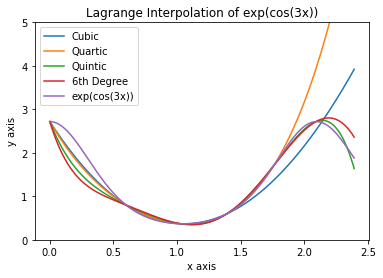

In [7]:
x= np.arange(240)/100;
y=np.exp(np.cos(3*x));

plt.figure()
plt.ylim(0, 5)

Lx=[0,0.6,1.03,1.39]
Ly=[2.718,0.797,0.368,0.597]
cubic_lagr = Lagrange(Lx,Ly,x)
plt.plot(x, cubic_lagr)

Lx=[0,0.6,1.03,1.39,1.76]
Ly=[2.718,0.797,0.368,0.597,1.712]
Quartic_lagr = Lagrange(Lx,Ly,x)
plt.plot(x, Quartic_lagr)

Lx=[0,0.6,1.03,1.39,1.76,2.09]
Ly=[2.718,0.797,0.368,0.597,1.712,2.718]
Quintic_lagr = Lagrange(Lx,Ly,x)
plt.plot(x, Quintic_lagr)

Lx=[0,0.6,1.03,1.39,1.76,2.09,2.29]
Ly=[2.718,0.797,0.368,0.597,1.712,2.718,2.7]
six_deg_lagr = Lagrange(Lx,Ly,x)
plt.plot(x, six_deg_lagr)

plt.plot(x, y)


plt.legend(['Cubic','Quartic','Quintic','6th Degree','exp(cos(3x))']);
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Lagrange Interpolation of exp(cos(3x))')
plt.show()

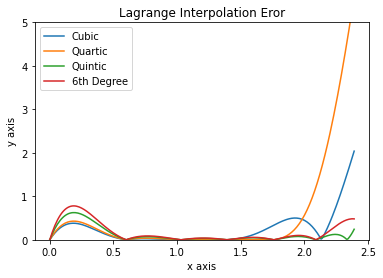

In [9]:
plt.figure()
plt.ylim(0, 5)

plt.plot(x, abs(y-cubic_lagr))
plt.plot(x, abs(y-Quartic_lagr))
plt.plot(x, abs(y-Quintic_lagr))
plt.plot(x, abs(y-six_deg_lagr))

plt.legend(['Cubic','Quartic','Quintic','6th Degree'])
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Lagrange Interpolation Eror')
plt.show()

# LU Decomposition

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
def lu(A):
	[r,c] = np.shape(A)
	U = A.astype('float32')
	L = np.eye(r)
	for i in range(r-1):
		fac=U[i+1,i]/U[i,i]
		U[i+1,:]-=fac*U[i]
		L[i+1,i]=fac
	return L, U
H=np.matrix([[1,4,2,3],[3,4,1,7],[0,2,3,4],[0,0,1,3]])
lu(H)

(array([[ 1.       ,  0.       ,  0.       ,  0.       ],
        [ 3.       ,  1.       ,  0.       ,  0.       ],
        [ 0.       , -0.25     ,  1.       ,  0.       ],
        [ 0.       ,  0.       ,  0.5714286,  1.       ]]),
 matrix([[ 1.  ,  4.  ,  2.  ,  3.  ],
         [ 0.  , -8.  , -5.  , -2.  ],
         [ 0.  ,  0.  ,  1.75,  3.5 ],
         [ 0.  ,  0.  ,  0.  ,  1.  ]], dtype=float32))

# SVD & FFT Compression 

In [28]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [29]:
try: 
	img = Image.open(r"C:\Users\asus\Desktop\2\256x256_color\1.tiff").convert('L')
except IOError:
	pass

## SVD Method

### Grayscale Image

In [30]:
def SVD(data, comp):
	U,S,VT=np.linalg.svd(data,full_matrices=False)
	sv_size=len(np.diag(S))
	k=round(sv_size*comp)
	data_comp= np.dot(U[:,:k],np.dot(np.diag(S[:k]),VT[:k,:]))
	return data_comp

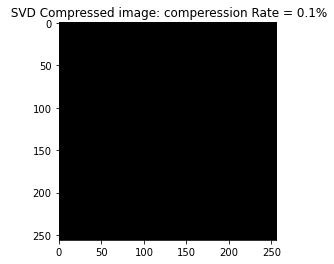

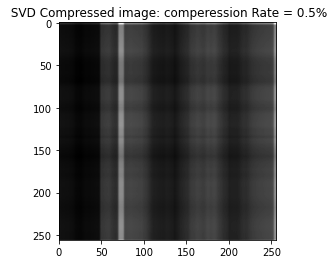

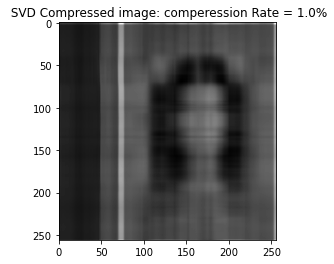

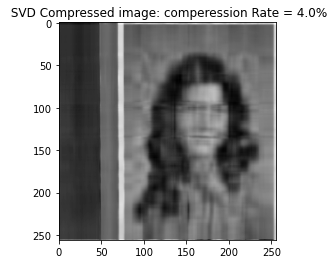

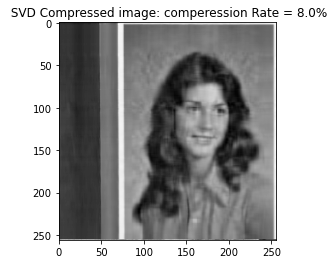

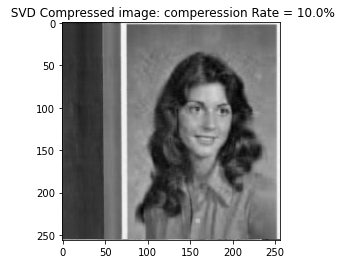

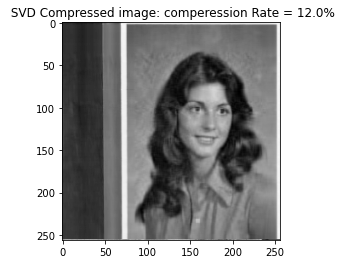

In [31]:
for comp_size in (0.001, 0.005, 0.01, 0.04, 0.08, 0.1,0.12):
	img_comp=SVD(img,comp_size)
	plt.figure()
	plt.imshow(img_comp,cmap='gray');
	plt.title(' SVD Compressed image: comperession Rate = ' + str(comp_size*100)+'%')

### Color Image

In [32]:
try: 
	color_img = np.array(Image.open(r"C:\Users\asus\Desktop\2\256x256_color\1.tiff"))
except IOError:
	pass
img_comp=color_img.copy()

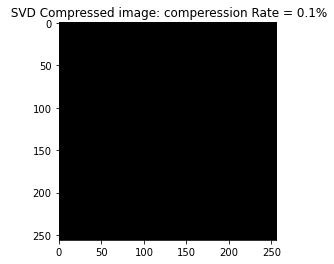

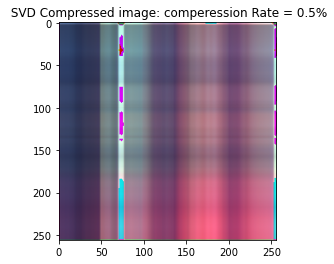

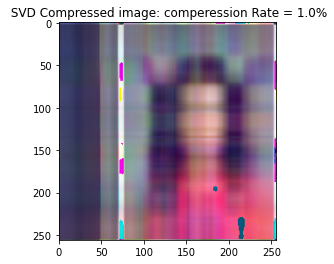

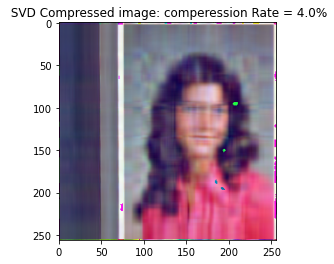

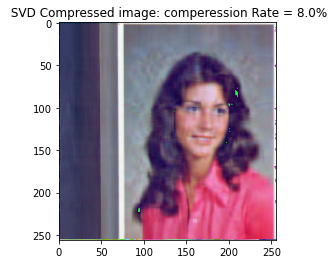

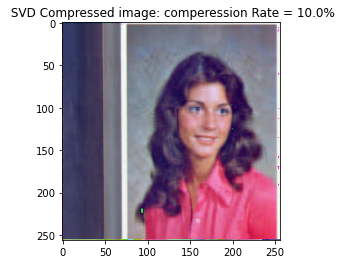

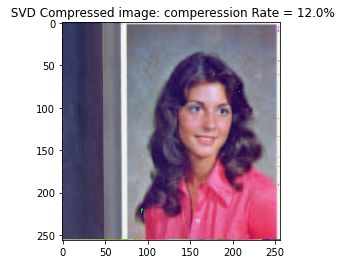

In [33]:
for comp_size in (0.001, 0.005, 0.01, 0.04, 0.08, 0.1,0.12):
	for i in range(3):
		img_comp[:,:,i]=SVD(color_img[:,:,i],comp_size)
	plt.figure()
	plt.imshow(img_comp);
	plt.title(' SVD Compressed image: comperession Rate = ' + str(comp_size*100)+'%')

## FFT Method

### Grayscale Image

In [34]:
def FFT(gray_img,copmp_size):
	fft_img=np.fft.fft2(gray_img)
	fft_img_sort = np.sort(np.abs(fft_img.reshape(-1))) # sort by magnitude
	thresh = fft_img_sort[int(np.floor((1-comp_size)*len(fft_img_sort)))]
	ind = np.abs(fft_img)>thresh          # Find small indices
	Atlow = fft_img * ind                 # Threshold small indices
	Alow = np.fft.ifft2(Atlow).real  # Compressed image
	return Alow

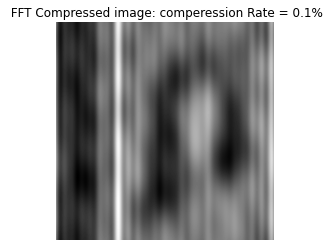

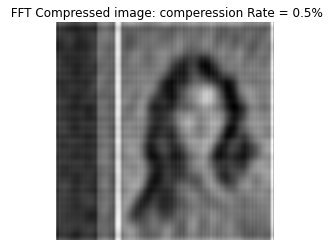

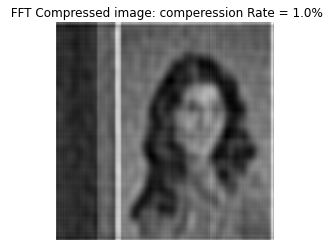

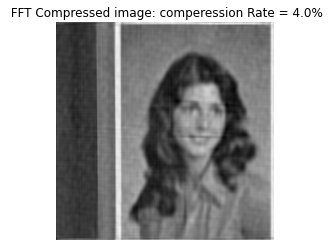

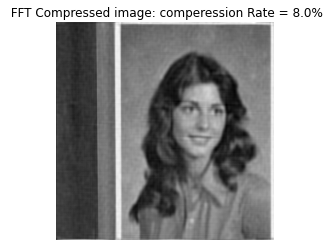

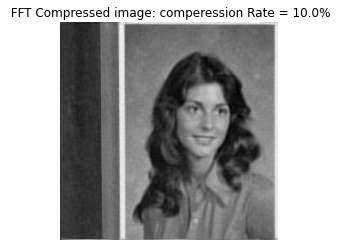

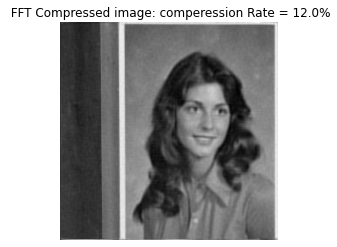

In [35]:
for comp_size in (0.001, 0.005, 0.01, 0.04, 0.08, 0.1,0.12):
	plt.figure()
	plt.imshow(FFT(img,comp_size),cmap='gray')
	plt.axis('off')
	plt.title(' FFT Compressed image: comperession Rate = ' + str(comp_size*100)+'%')

### Color Image

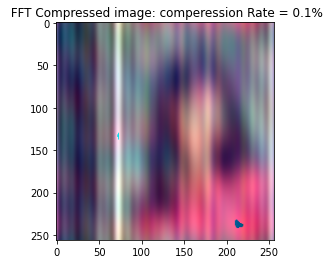

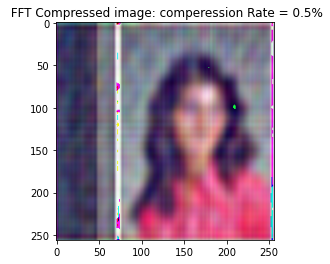

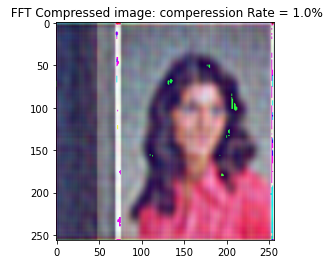

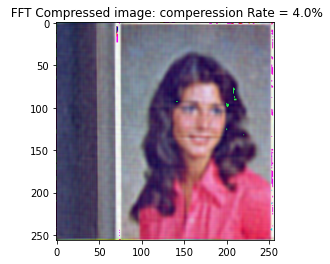

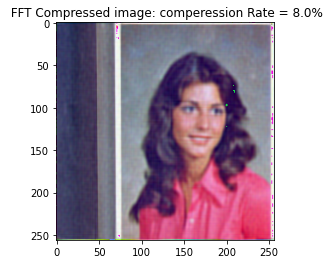

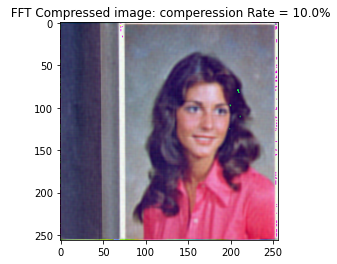

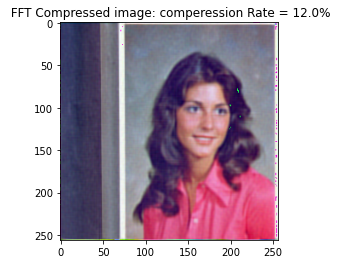

In [36]:
for comp_size in (0.001, 0.005, 0.01, 0.04, 0.08, 0.1,0.12):
	for i in range(3):
		img_comp[:,:,i]=FFT(color_img[:,:,i],comp_size)
	plt.figure()
	plt.imshow(img_comp);
	plt.title(' FFT Compressed image: comperession Rate = ' + str(comp_size*100)+'%')

# Image Denoising

In [38]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

## SVD Method

In [39]:
def svd_denoise(image, k):
    # Convert image to float64 format

    # Compute the SVD decomposition for each color channel
	U, s, V = np.linalg.svd(image)
	denoised = np.matmul(U[:, :k], np.matmul(np.diag(s[:k]), V[:k, :]))
	return denoised

In [50]:
try: 
	image = np.array(Image.open(r"C:\Users\asus\Desktop\2\256x256_noisy\1.jpeg"))
except IOError:
	pass

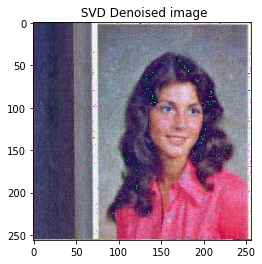

In [51]:
for i in range (3):
	img_denoised[:,:,i]=svd_denoise(image[:,:,i],k=50)
plt.figure()
plt.imshow(img_denoised);
plt.title(' SVD Denoised image')
plt.show()

## FFT Method

In [52]:
def denoise_fft(img, threshold):
    # perform FFT
    img_fft = np.fft.fft2(img)

    img_fft[np.abs(img_fft) < threshold] = 0

    img_denoised = np.fft.ifft2(img_fft).real
    return img_denoised

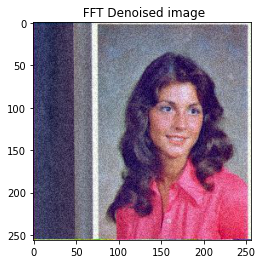

In [53]:
for i in range (3):
	img_denoised[:,:,i]=denoise_fft(image[:,:,i],threshold=10)
plt.figure()
plt.imshow(img_denoised);
plt.title(' FFT Denoised image')
plt.show()

# Histogram matching

In [63]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [64]:
def hist_norm(source, template):
    olddtype = source.dtype
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)
    interp_t_values = interp_t_values.astype(olddtype)
    return interp_t_values[bin_idx].reshape(oldshape)

In [65]:
def ecdf(x):
    vals, counts = np.unique(x, return_counts=True)
    ecdf = np.cumsum(counts).astype(np.float64)
    ecdf /= ecdf[-1]
    return vals, ecdf

In [66]:
try: 
	source = np.array(Image.open(r"C:\Users\asus\Desktop\HistogramMatching_images\Source.jpg"))
except IOError:
	pass

try: 
	template = np.array(Image.open(r"C:\Users\asus\Desktop\HistogramMatching_images\Reference.jpg"))
except IOError:
	pass

In [67]:
matched = hist_norm(source, template)
x1, y1 = ecdf(source.ravel())
x2, y2 = ecdf(template.ravel())
x3, y3 = ecdf(matched.ravel())

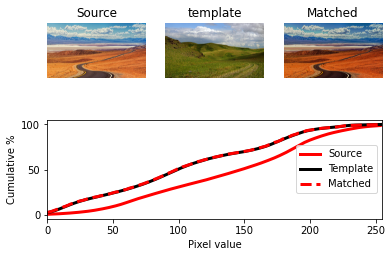

In [62]:
fig = plt.figure()
gs = plt.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs[1, 0], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs[1, 1])

for aa in (ax1, ax2, ax3):
    aa.set_axis_off()
ax1.imshow(source, cmap=plt.cm.gray)
ax1.set_title('Source')
ax2.imshow(template, cmap=plt.cm.gray)
ax2.set_title('Template')
ax3.imshow(matched, cmap=plt.cm.gray)
ax3.set_title('Matched')
ax4.plot(x1, y1 * 100, '-r', lw=3, label='Source')
ax4.plot(x2, y2 * 100, '-k', lw=3, label='Template')
ax4.plot(x3, y3 * 100, '--r', lw=3, label='Matched')
ax4.set_xlim(x1[0], x1[-1])
ax4.set_xlabel('Pixel value')
ax4.set_ylabel('Cumulative %')
ax4.legend(loc=5)

plt.show()

# Modified Gram-Schmidt

In [68]:
import copy
import numpy as np
from matplotlib import pyplot as plt

In [69]:
def QR(A):
	r, c = A.shape
	Q = np.zeros((r, c),dtype=np.float64) # initialize matrix Q
	u = np.zeros((r, c),dtype=np.float64) # initialize matrix u
	u[:, 0] = copy.copy(A[:, 0])
	Q[:, 0] = u[:, 0] / np.linalg.norm(u[:, 0])
	for i in range(1, c):
		u[:, i] = A[:, i]
		for j in range(i):
			u[:, i] -= np.dot(A[:, i] , Q[:, j]) * Q[:, j] # get each u vector
		Q[:, i] = u[:, i] / np.linalg.norm(u[:, i]) # compute each e vetor
   # QT=np.transpose(Q)
	R = np.zeros((r, c),dtype=np.float64)
	for i in range(n):
		for j in range(i, c):
			R[i, j] = np.dot(A[:, j] , Q[:, i])
    #R=np.matmul(QT,A)
	return Q,R

In [70]:
def QR_Modified_Decomposition(A):
	r, c = A.shape # get the shape of A
	Q = np.zeros((r, c),dtype=np.float64) # initialize matrix Q
   # u = np.zeros((n, m),dtype=np.float64) # initialize matrix u
	R = np.zeros((r, c),dtype=np.float64)
	u = copy.copy(A)
	for i in range(c):
		R[i,i]=np.linalg.norm(u[:, i])
		Q[:, i] = u[:, i] / np.linalg.norm(u[:, i])
		for j in range(i,n):
			R[i,j]= np.dot(Q[:, i] , u[:, j])
			u[:, j] -= (np.dot(Q[:, i] , u[:, j]))* Q[:, i] # get each u vector
	return Q,R

In [71]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))
# set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))
# set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1),dtype=float))
# Set S to a diagonal matrix values between 2−1 and 2−(n+1)
A = np.matmul(U,np.matmul(S,V))
singular_value_A=np.diag(S)

q_Modified,r_Modified=QR_Modified_Decomposition(A)
singular_value_Modified=np.diag(r_Modified)

q_normal,r_normal=QR(A)
singular_value_normal=np.diag(r_normal)

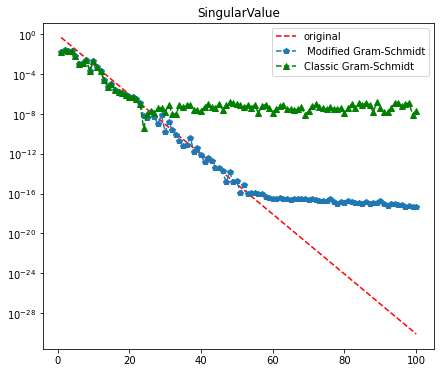

In [72]:
t = np.arange(1, n+1, 1)
plt.figure(figsize=(7, 6))
display(plt.plot(t, singular_value_A,'r--',t, np.abs(singular_value_Modified), 'p--',t, np.abs(singular_value_normal), 'g--^'))
plt.title('SingularValue')
plt.yscale('log')
plt.legend(['original',' Modified Gram-Schmidt', 'Classic Gram-Schmidt'])
plt.show()